Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Organizar los datos en un dataframe (cambiar la referencia al archivo según donde esté alojado)
CreditCardData=pd.read_csv('D:\creditcard.csv')

CreditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


a. Valores perdidos

In [7]:
#Comprobar si hay datos perdidos o con 0 amount
i=0
for i in range(len(CreditCardData)-1):
    if(CreditCardData.loc[i,'Amount']==0):
        CreditCardData.loc[i,'Amount']=np.nan

CreditCard_NoNan=CreditCardData.dropna(axis=0)

CreditCard_NoNan.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


b. Datos duplicados

In [9]:
#Comprueba si hay filas duplicadas
CreditDupl=CreditCard_NoNan.duplicated()
CreditCard_NoNan['Duplicated']=CreditDupl

CreditCardData_NoDupl=CreditCard_NoNan[CreditCard_NoNan.Duplicated==False]

CreditCardData_limpio=CreditCardData_NoDupl.drop('Duplicated',axis=1)

CreditCardData_limpio.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?

In [11]:
# Calcular el porcentaje de transacciones fraudulentas

CreditCardData_Fraude=CreditCardData_limpio[CreditCardData_limpio.Class>0]

PorcentajeFraudes=(len(CreditCardData_Fraude)/len(CreditCardData_limpio))*100

# Mostrar el porcentaje de transacciones fraudulentas
print('El porcentaje de fraudes es: ', round(PorcentajeFraudes,2), '%')


El porcentaje de fraudes es:  0.16 %


¿Cuál es el importe medio de las transacciones fraudulentas?

In [13]:
# Calcular el importe medio de las transacciones fraudulentas

MediaAmount=CreditCardData_Fraude.Amount.sum()/len(CreditCardData_Fraude)

# Mostrar el importe medio de las transacciones fraudulentas
print('La media de fraudes es: ',round(MediaAmount,2) ,'€')

La media de fraudes es:  130.78 €


Comparación transacciones fraudulentas con las no fraudulentas (Utilizando un gráfico de barras)

Hay  448  transacciones fraudulentas y  281470  transacciones no fraudulentas


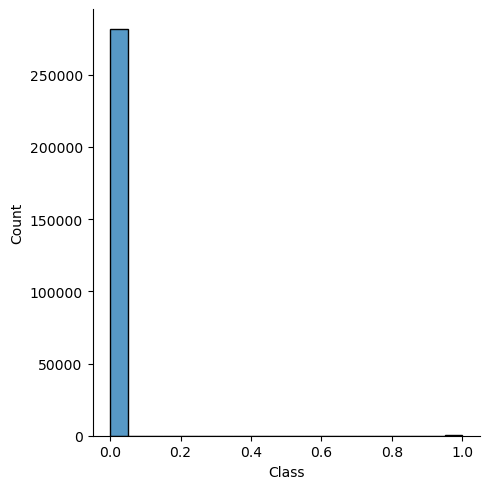

In [19]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
f=len(CreditCardData_Fraude)
c=len(CreditCardData_limpio)
print('Hay ',f ,' transacciones fraudulentas y ', c-f,' transacciones no fraudulentas')

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
m1=sns.displot(CreditCardData_limpio.Class)

Distribución de los importes de las transacciones fraudulentas (Utilizando un histograma)

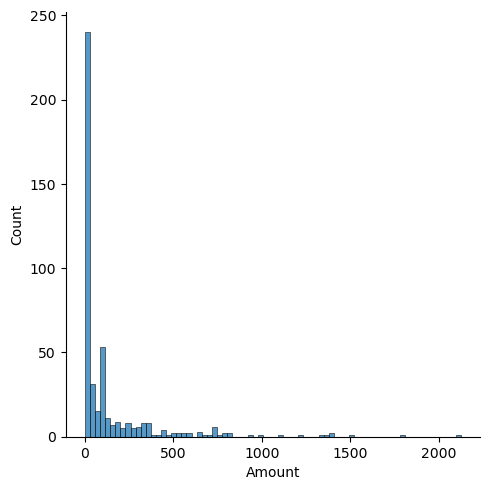

In [21]:
# Separar los datos de transacciones fraudulentas
Filtro=CreditCardData_limpio.Class>0
Credit_Fraude=CreditCardData_limpio[Filtro]

# Mostrar la distribución de los importes de las transacciones fraudulentas

m2=sns.displot(Credit_Fraude.Amount)

## Desarrollo y evaluación de modelos

In [23]:
# Importar sklearn ,Separar los datos de entrenamiento y evaluación
from sklearn.model_selection import train_test_split

g=CreditCardData_limpio.drop('Class', axis=1)
r=CreditCardData_limpio['Class']

X_Train, X_Test, Y_Train, Y_Test= train_test_split(g,r,test_size=0.3)

In [25]:
#Crear el modelo con Random Forest
from sklearn.ensemble import RandomForestClassifier

randomForest=RandomForestClassifier(n_estimators=80)
randomForest.fit(X_Train,Y_Train)

predicciones=randomForest.predict(X_Test)

In [31]:
#Comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Classification report:')
print(classification_report(Y_Test, predicciones))
print('Confusion matrix:')
print(confusion_matrix(Y_Test,predicciones))
print('Accuracy percentage:')
print(round(accuracy_score(Y_Test, predicciones)*100,2),'%')

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84440
           1       0.92      0.82      0.86       136

    accuracy                           1.00     84576
   macro avg       0.96      0.91      0.93     84576
weighted avg       1.00      1.00      1.00     84576

Confusion matrix:
[[84430    10]
 [   25   111]]
Accuracy percentage:
99.96 %


In [ ]:
# Exportar el modelo a continuacion